# 尝试使用yolov5各流程

## Setup

In [1]:
# add yolov5 path to the system path
%cd ../yolov5

/home/aor/projects/Developing/pdf-parser/pdf_parser/detection/yolov5


In [2]:
%pip install -qr requirements.txt comet_ml
import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 2024-4-13 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)


Setup complete ✅ (32 CPUs, 15.5 GB RAM, 224.7/1006.9 GB disk)


## Detect

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-4-13 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /home/aor/projects/Developing/pdf-parser/pdf_parser/detection/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 42.4ms
image 2/2 /home/aor/projects/Developing/pdf-parser/pdf_parser/detection/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 43.8ms
Speed: 0.5ms pre-process, 43.1ms inference, 39.6ms NMS per image at shape (1, 3

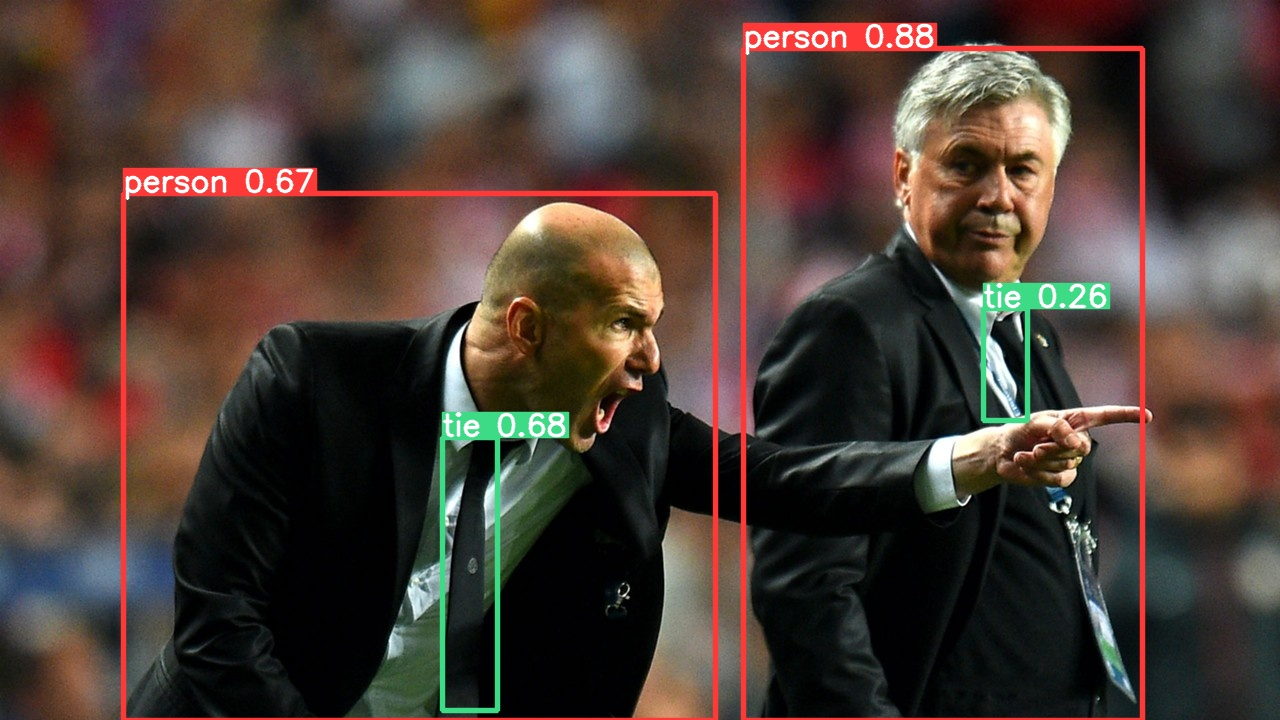

In [4]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

## Validate

In [6]:
# Download COCO val
#torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', '../test/tmp.zip')  # download (780M - 5000 images)
#!unzip -q ../test/tmp.zip -d ../test/datasets && rm ../test/tmp.zip  # unzip

100%|██████████| 780M/780M [06:07<00:00, 2.23MB/s]   


In [7]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/home/aor/projects/Developing/pdf-parser/pdf_parser/detection/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 2024-4-13 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning /home/aor/projects/Developing/pdf-parser/data/coco/val2017... 4952
val: New cache created: /home/aor/projects/Developing/pdf-parser/data/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   
                   all       5000      36335      0.671      0.519      0.566      0.371
Speed: 0.1ms pre-process, 0.9ms inference, 1.1ms NMS per image at shap

## Train

In [3]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2024-4-13 Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0,